Run 1: 100%|██████████| 10000/10000 [01:17<00:00, 128.53it/s]


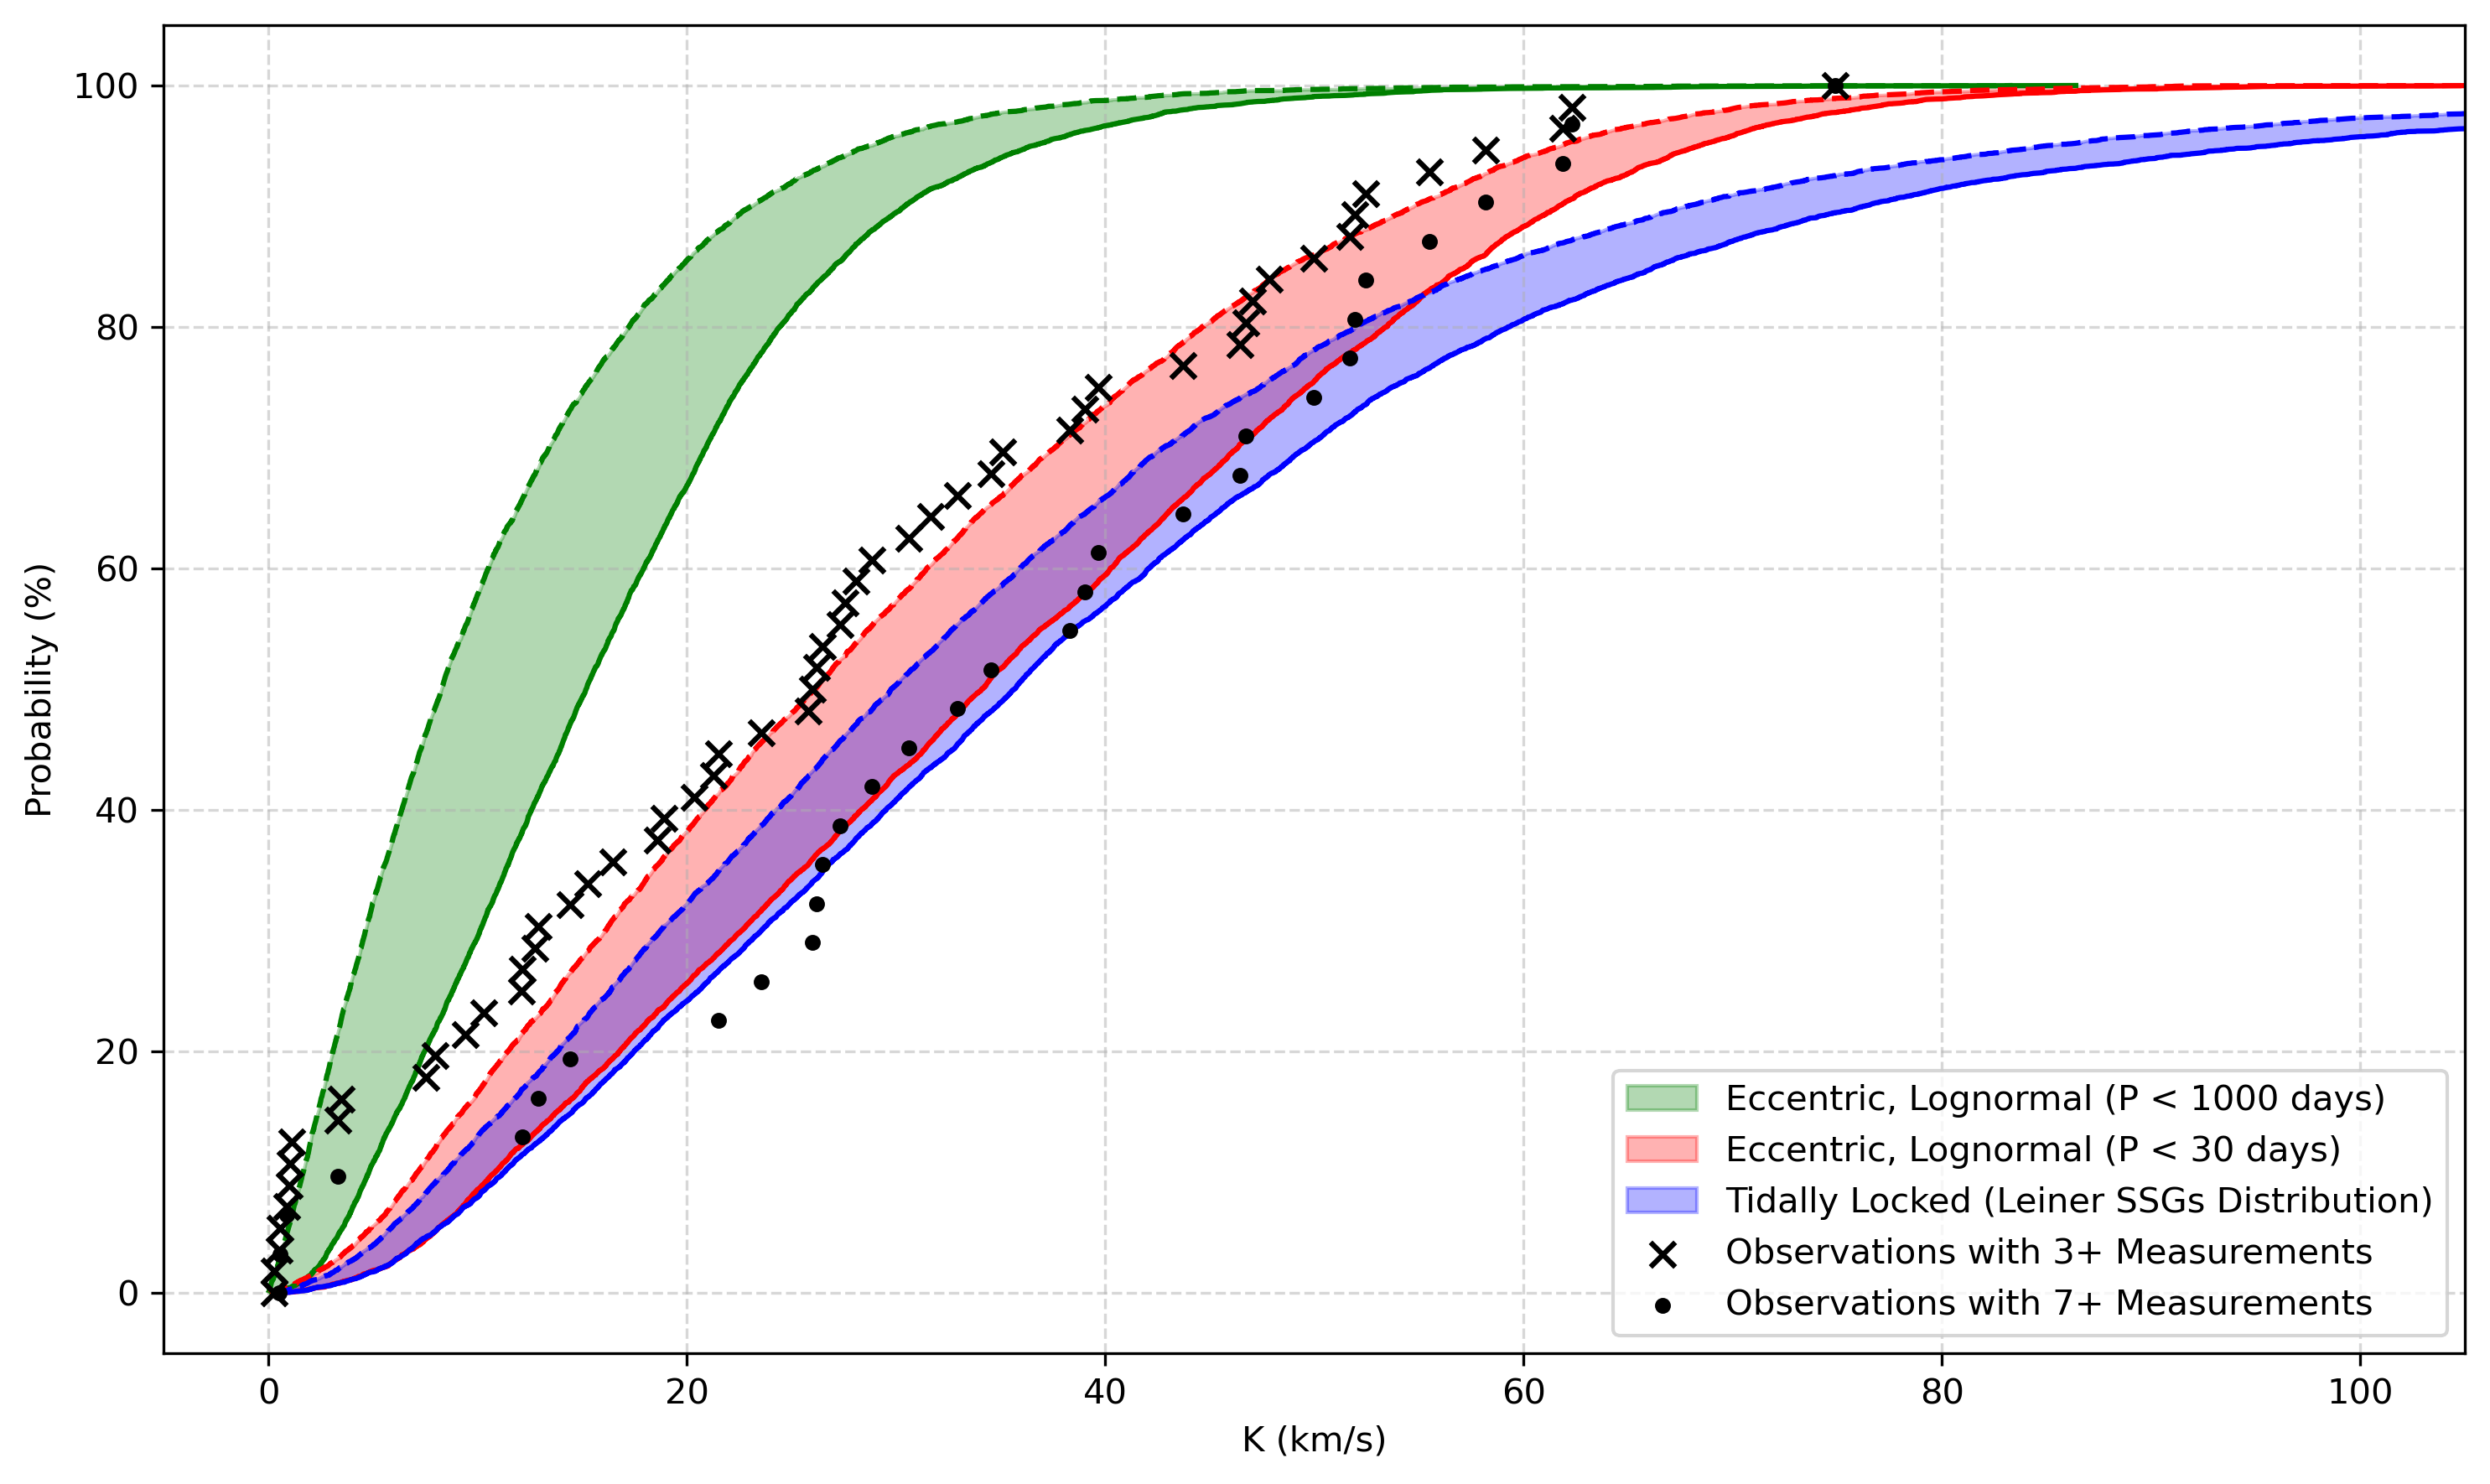

KS, measured sets: ['0.4603', '0.1446', '0.1540', '0.6605', '0.2170', '0.1507']
KS, actual sets:   ['0.3544', '0.2058', '0.2256', '0.5507', '0.1170', '0.1464']

p-val, measured sets: ['0.0000', '0.1690', '0.1220', '0.0000', '0.0849', '0.4226']
p-val, actual sets:   ['0.0000', '0.0139', '0.0051', '0.0000', '0.7317', '0.4578']


In [19]:
from SamplingRVs import runsamples
%matplotlib inline

#Before running, check the SamplingRVs.py file and change all relevant filepaths



numruns = 1                 #Number of times we want to run the CDF generation - multiple runs = multiple plots
numsamples = 10000          #Number of samples for each simulated distribution

orbsamplerange = [3, 14]    #Orbit sampling range - e.g, the orbits are observed between 3 and 14 times each (uniform random selection on this interval)
samplim = 7                 #Lower bound for "good" data - e.g, sets the lower selected values for our data points.

displayCDF = True           #Display CDF yes/no (True/False)
SaveFig = True              #Save the figure yes/no
PrintTest = True            #Print KS test results yes/no
savefigname = "CDF_TEST_1"  #Name of saved CDF file

mKSval_total = []           #'Measured' dataset KS values
aKSval_total = []           #'Actual' dataset KS values
mpval_total = []            #'Measured' dataset p values
apval_total = []            #'Actual' dataset p values



for i in range(numruns):      #Run the test with the runsamples function from the SamplingRVs.py file 
    run = i + 1
    mKSval, aKSval, mpval, apval = runsamples(numsamples, orbsamplerange, samplim, run, displayCDF, SaveFig, PrintTest, savefigname)
    mKSval_total.append([mKSval])
    aKSval_total.append([aKSval])
    mpval_total.append([mpval])
    apval_total.append([apval])






In [20]:
####
#Manually isolates each KS and p values for each desired set. 
#Tries to comminicate the meaning properly, used as a template for the table in the paper.
#If muliple runs are used, then standard deviations for each value will exist.
import numpy as np
####

Full_1000_m = []
Full_1000_a = []

Full_30_m = []
Full_30_a = []

Full_T_m = []
Full_T_a = []


for i in range(len(mKSval_total)):
    Full_1000_m.append([mKSval_total[i][0][0], mpval_total[i][0][0]])
    Full_1000_a.append([aKSval_total[i][0][0], apval_total[i][0][0]])

    Full_30_m.append([mKSval_total[i][0][1], mpval_total[i][0][1]])
    Full_30_a.append([aKSval_total[i][0][1], apval_total[i][0][1]])

    Full_T_m.append([mKSval_total[i][0][2], mpval_total[i][0][2]])
    Full_T_a.append([aKSval_total[i][0][2], apval_total[i][0][2]])


column_means1 = np.mean(Full_1000_m, axis=0)
column_STDs1 = np.std(Full_1000_m, axis = 0)
column_means2 = np.mean(Full_1000_a, axis=0)
column_STDs2 = np.std(Full_1000_a, axis = 0)

column_means3 = np.mean(Full_30_m, axis=0)
column_STDs3 = np.std(Full_30_m, axis = 0)
column_means4 = np.mean(Full_30_a, axis=0)
column_STDs4 = np.std(Full_30_a, axis = 0)

column_means5 = np.mean(Full_T_m, axis=0)
column_STDs5 = np.std(Full_T_m, axis = 0)
column_means6 = np.mean(Full_T_a, axis=0)
column_STDs6 = np.std(Full_T_a, axis = 0)

print(f"""Mean Values for {numruns} runs:
{numsamples} samples taken in each run:
##################################

Full Observations compared to each simulated distribution:
    Eccentric, Lognormal (P < 1000 days)
        Measured:   KS vals [mean: {column_means1[0]:.4f} | STD = {column_STDs1[0]:.4f}], p-vals [mean: {column_means1[1]:.4f} | STD = {column_STDs1[1]:.4f}]
        Actual:     KS vals [mean: {column_means2[0]:.4f} | STD = {column_STDs2[0]:.4f}], p-vals [mean: {column_means2[1]:.4f} | STD = {column_STDs2[1]:.4f}]
    
    Eccentric, Lognormal (P < 30 days)
        Measured:   KS vals [mean: {column_means3[0]:.4f} | STD = {column_STDs3[0]:.4f}], p-vals [mean: {column_means3[1]:.4f} | STD = {column_STDs3[1]:.4f}]
        Actual:     KS vals [mean: {column_means4[0]:.4f} | STD = {column_STDs4[0]:.4f}], p-vals [mean: {column_means4[1]:.4f} | STD = {column_STDs4[1]:.4f}]
    
    Tidally Locked (Leiner SSGs Distribution)
        Measured:   KS vals [mean: {column_means5[0]:.4f} | STD = {column_STDs5[0]:.4f}], p-vals [mean: {column_means5[1]:.4f} | STD = {column_STDs5[1]:.4f}]
        Actual:     KS vals [mean: {column_means6[0]:.4f} | STD = {column_STDs6[0]:.4f}], p-vals [mean: {column_means6[1]:.4f} | STD = {column_STDs6[1]:.4f}]

""")


####
# 7+ measurments  Distribution, sets 0, 1, 2

####

lim_1000_m = []
lim_1000_a = []

lim_30_m = []
lim_30_a = []

lim_T_m = []
lim_T_a = []


for i in range(len(mKSval_total)):
    lim_1000_m.append([mKSval_total[i][0][3], mpval_total[i][0][3]])
    lim_1000_a.append([aKSval_total[i][0][3], apval_total[i][0][3]])

    lim_30_m.append([mKSval_total[i][0][4], mpval_total[i][0][4]])
    lim_30_a.append([aKSval_total[i][0][4], apval_total[i][0][4]])

    lim_T_m.append([mKSval_total[i][0][5], mpval_total[i][0][5]])
    lim_T_a.append([aKSval_total[i][0][5], apval_total[i][0][5]])


column_means7 = np.mean(lim_1000_m, axis=0)
column_STDs7 = np.std(lim_1000_m, axis = 0)
column_means8 = np.mean(lim_1000_a, axis=0)
column_STDs8 = np.std(lim_1000_a, axis = 0)

column_means9 = np.mean(lim_30_m, axis=0)
column_STDs9 = np.std(lim_30_m, axis = 0)
column_means10 = np.mean(lim_30_a, axis=0)
column_STDs10 = np.std(lim_30_a, axis = 0)

column_means11 = np.mean(lim_T_m, axis=0)
column_STDs11 = np.std(lim_T_m, axis = 0)
column_means12 = np.mean(lim_T_a, axis=0)
column_STDs12 = np.std(lim_T_a, axis = 0)

print(f"""##################################

Observations with {samplim}+ Measurements compared to each distribution:
    Eccentric, Lognormal (P < 1000 days)
        Observed:   KS vals [mean: {column_means7[0]:.4f} | STD = {column_STDs7[0]:.4f}], p-vals [mean: {column_means7[1]:.4f} | STD = {column_STDs7[1]:.4f}]
        Expected:     KS vals [mean: {column_means8[0]:.4f} | STD = {column_STDs8[0]:.4f}], p-vals [mean: {column_means8[1]:.4f} | STD = {column_STDs8[1]:.4f}]

    Eccentric, Lognormal (P < 30 days)
        Observed:   KS vals [mean: {column_means9[0]:.4f} | STD = {column_STDs9[0]:.4f}], p-vals [mean: {column_means9[1]:.4f} | STD = {column_STDs9[1]:.4f}]
        Expected:     KS vals [mean: {column_means10[0]:.4f} | STD = {column_STDs10[0]:.4f}], p-vals [mean: {column_means10[1]:.4f} | STD = {column_STDs10[1]:.4f}]
    
    Tidally Locked (Leiner SSGs Distribution)
        Observed:   KS vals [mean: {column_means11[0]:.4f} | STD = {column_STDs11[0]:.4f}], p-vals [mean: {column_means11[1]:.4f} | STD = {column_STDs11[1]:.4f}]
        Expected:     KS vals [mean: {column_means12[0]:.4f} | STD = {column_STDs12[0]:.4f}], p-vals [mean: {column_means12[1]:.4f} | STD = {column_STDs12[1]:.4f}]

    """)




Mean Values for 1 runs:
10000 samples taken in each run:
##################################

Full Observations compared to each simulated distribution:
    Eccentric, Lognormal (P < 1000 days)
        Measured:   KS vals [mean: 0.4603 | STD = 0.0000], p-vals [mean: 0.0000 | STD = 0.0000]
        Actual:     KS vals [mean: 0.3544 | STD = 0.0000], p-vals [mean: 0.0000 | STD = 0.0000]
    
    Eccentric, Lognormal (P < 30 days)
        Measured:   KS vals [mean: 0.1446 | STD = 0.0000], p-vals [mean: 0.1690 | STD = 0.0000]
        Actual:     KS vals [mean: 0.2058 | STD = 0.0000], p-vals [mean: 0.0139 | STD = 0.0000]
    
    Tidally Locked (Leiner SSGs Distribution)
        Measured:   KS vals [mean: 0.1540 | STD = 0.0000], p-vals [mean: 0.1220 | STD = 0.0000]
        Actual:     KS vals [mean: 0.2256 | STD = 0.0000], p-vals [mean: 0.0051 | STD = 0.0000]


##################################

Observations with 7+ Measurements compared to each distribution:
    Eccentric, Lognormal (P < 100

In [21]:
#KS test summary

print(f"""
KS Test - Comparing two CDF values to identify similarities in CDF and underlying distribution:
    KS statistic: Max difference between both CDFs, value of 0-1 (0-100%, y axis)
        Large KS = Large difference = LESS similarity
        Small KS = Small difference = MORE similarity
    
    p-value: are these data sets drawn from the same underlying distribution?
        Large p (p > 0.05) = sets are drawn from SIMILAR (or same) distribution
        Small p (p < 0.05) = sets are drawn from DIFFERENT distributions

The following code looks at the difference between our sampled data
    Full Distribution
    {samplim}+ measurements
It compares these datasets to the "Measured" and "Actual" datasets created from the three underlying distributions we want to compare:
    Eccentric, Lognormal (0-1000 days)
    Eccentric, Lognormal (0-30 days)
    Tidally Locked (Leiner SSGs Distribution)

So, we're looking for the results with the LOWEST KS value, and HIGHEST p values

""")


KS Test - Comparing two CDF values to identify similarities in CDF and underlying distribution:
    KS statistic: Max difference between both CDFs, value of 0-1 (0-100%, y axis)
        Large KS = Large difference = LESS similarity
        Small KS = Small difference = MORE similarity
    
    p-value: are these data sets drawn from the same underlying distribution?
        Large p (p > 0.05) = sets are drawn from SIMILAR (or same) distribution
        Small p (p < 0.05) = sets are drawn from DIFFERENT distributions

The following code looks at the difference between our sampled data
    Full Distribution
    7+ measurements
It compares these datasets to the "Measured" and "Actual" datasets created from the three underlying distributions we want to compare:
    Eccentric, Lognormal (0-1000 days)
    Eccentric, Lognormal (0-30 days)
    Tidally Locked (Leiner SSGs Distribution)

So, we're looking for the results with the LOWEST KS value, and HIGHEST p values


